In [1]:
from mpmath import *
from sympy import *
from sympy.interactive import printing
import matplotlib.pyplot as plt
printing.init_printing(use_latex=True)
mp.dps = 15; mp.pretty = True
from sympy import sieve
import numpy as np

<br>




# Aufgabe 1

<br>




<div style="text-align: justify">Zeichnen Sie eine Hauswand mit der Breite 10 und der Höhe 6. Die Ecken der Hauswand sollen dabei in den vier Punkten $P_{1}(0, 0) , \,\,P_{2}(10, 0),\,\, P_{3}(10, 6) \,\,\,und\,\,\, {    }P_{4}(0, 6)$ liegen. Auf dieser Hauswand befinden sich sechs quadratische Fenster, deren Höhe und Breite jeweils 2 ist. Der Abstand zwischen den Fenstern ist horizontal gleich 1 und vertikal 2/3. Zeichnen Sie die sechs Fenster auf die Hauswand, so wie unten abgebildet. Beachten Sie dabei, dass die Ecken der Hauswand und der Fenster später noch transformiert werden. Am einfachsten wird es daher sein, die Ecken als Paare $[0,0],...$ usw. in einer Liste abzulegen, damit sie später weiter bearbeitet werden können. Das Zeichnen können Sie relativ einfach mit
dem plt.plot–Befehl durchführen, so wie Sie das von dem Streckenzug des zweiten Aufgabenblatts schon kennen.</div>



<br>



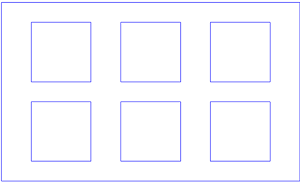



<br>


In [2]:
#Hauswand_Ecken_Punkte

Wand = [[0,0], [10,0], [10,6], [0,6],[0,0]]


#Fenster_Ecken_Punkte

F_1= [[1,(2/3)], [3,(2/3)], [3,(2/3)+2], [1,(2/3)+2],[1,(2/3)]]

F_2= [[4,(2/3)], [6,(2/3)], [6,(2/3)+2], [4,(2/3)+2],[4,(2/3)]]

F_3= [[7,(2/3)], [9,(2/3)], [9,(2/3)+2], [7,(2/3)+2],[7,(2/3)]]

F_4= [[1,(2/3)*2+2], [3,(2/3)*2+2], [3,((2/3)+2)*2], [1,((2/3)+2)*2],[1,(2/3)*2+2]]

F_5= [[4,(2/3)*2+2], [6,(2/3)*2+2], [6,((2/3)+2)*2], [4,((2/3)+2)*2],[4,(2/3)*2+2]]

F_6= [[7,(2/3)*2+2], [9,(2/3)*2+2], [9,((2/3)+2)*2], [7,((2/3)+2)*2],[7,(2/3)*2+2]]


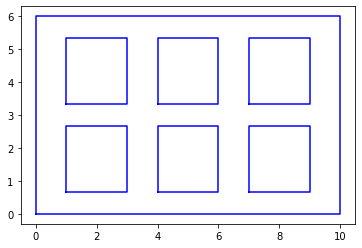

In [3]:
%matplotlib inline

#Plots

plt.plot([l[0] for l in Wand], [l[1] for l in Wand], color='b') #Wand
plt.plot([l[0] for l in F_1], [l[1] for l in F_1], color='b')   #Fenster_1
plt.plot([l[0] for l in F_2], [l[1] for l in F_2], color='b')   #Fenster_2
plt.plot([l[0] for l in F_3], [l[1] for l in F_3], color='b')   #Fenster_3
plt.plot([l[0] for l in F_4], [l[1] for l in F_4], color='b')   #Fenster_4
plt.plot([l[0] for l in F_5], [l[1] for l in F_5], color='b')   #Fenster_5
plt.plot([l[0] for l in F_6], [l[1] for l in F_6], color='b')   #Fenster_6

<br>




# Aufgabe 2

<br>




Für manche Berechnungen stellt man Punkte wie in Aufgabe 1 mit sogenannten homogenen Koordinaten dar, d.h. aus einem Punkt P(x,y) wird ein Spaltenvektor der Länge drei


$$\begin{bmatrix} x \\  y\\ 1 \end{bmatrix}$$


bei dem die dritte Koordinate fest auf 1 gesetzt wird. 

<br>
    
**Schreiben Sie eine Python-Funktion**, die Punkte, so wie Sie sie für die Ecken in Aufgabe 1 verwendet haben, in Spaltenvektoren mit homogenen Koordinaten verwandelt (**Hinweis: benutzen Sie den Befehl "Matrix" zur Erzeugung eine Matrix von Spaltenvektoren. Jeder Spaltenvektor entspricht einem Punkt**).

#### Ein Beispiel:
Wenn die Eingabe dieser Python-Funktion diese Liste von Punkten $[[0,0],[5,1],[9,2]]$ ist, soll ihre Ausgabe diese Matrix von Spaltenvektoren
<br>

$$\begin{bmatrix} 0 & 5 & 9 \\ 0 & 1 & 2 \\ 1 & 1 & 1 \end{bmatrix}$$ sein.

#### Eklärung:
Vom Mathematischen ist dabei zu beachten, dass jedes Vielfache eines solchen Vektors den gleichen Punkt darstellt. Die
Vektoren


$$\begin{bmatrix} 1 \\  1\\ 1 \end{bmatrix} \,\,\,\,\,\,und\,\,\,\,\,\, \begin{bmatrix} 4 \\  4\\ 4 \end{bmatrix}$$


beschreiben also z.B. den gleichen Punkt. Die „normalen“ (also kartesischen) Koordinaten eines solchen Punktes P ergeben sich, indem man die homogenen Koordinaten
$$\begin{bmatrix} x \\  y\\ z \end{bmatrix}$$


zu P(x/z, y/z) umrechnet. Die beiden obigen Vektoren repräsentieren also beide den Punkt P(1, 1). (**Homogene Koordinaten wurden im Skript im Abschnitt 6.4.7 eingeführt und im Zusammenhang mit der Translation im Abschnitt 6.4.6 verwendet.**)


In [4]:
def spaltenvektoren(Punkten):
    M = Matrix(Punkten)
    M = M.T
    return M.row_insert(2, Matrix([[1,1,1,1,1]]))

spaltenvektoren(F_1)

⎡        1                  3                 3                 1             
⎢                                                                             
⎢0.666666666666667  0.666666666666667  2.66666666666667  2.66666666666667  0.6
⎢                                                                             
⎣        1                  1                 1                 1             

     1        ⎤
              ⎥
66666666666667⎥
              ⎥
     1        ⎦

<br>




# Aufgabe 3

<br>




Schreiben Sie eine **Python-Funktion**, die eine Matrix von Spaltenvektoren mit homogenen Koordinaten wieder in Punkte mit kartesischen Koordinaten zurück verwandelt.

#### Ein Beispiel:
Wenn die Eingabe dieser Python-Funktion diese Matrix von Spaltenvektoren
<br>

$$\begin{bmatrix} 0 & 5 & 9 \\ 0 & 1 & 6 \\ 2 & 1 & 3 \end{bmatrix}$$ ist, soll ihre Ausgabe diese Liste von Punkten $[[0,0],[5,1],[3,2]]$ sein.

In [5]:
def kartesicheKoordinaten(Mat):
    rueckgabeListe = []
    zwischenListe = []
    stellenZaehler = 0
    Mat = Mat.T
    
    for x in range(int(len(Mat)/3)):
        for n in range(2):
            zwischenListe.append(Mat[stellenZaehler]/Mat[2+(x*3)])
            stellenZaehler += 1
        rueckgabeListe.append(zwischenListe)
        zwischenListe = []
        stellenZaehler += 1
        
    return rueckgabeListe

print(kartesicheKoordinaten(spaltenvektoren(F_1)))

[[1, 0.666666666666667], [3, 0.666666666666667], [3, 2.66666666666667], [1, 2.66666666666667], [1, 0.666666666666667]]


<br>




# Aufgabe 4

<div style="text-align: justify">Ein Vorteil der homogenen Koordinaten liegt darin, dass sich viele Berechnungen damit sehr einfach durchführen lassen. Wir zeichnen jetzt z.B. die Hauswand mit den Fenstern aus Aufgabe 1 perspektivisch. Dazu werden allen Ecken mit Hilfe der Python-Funktion aus Aufgabe 2 in homogene Koordinaten umgewandelt. Anschließend multiplizieren Sie die so erhaltenen Vektoren mit der folgenden Matrix A:<div>


$$\begin{bmatrix} 18 & 0 & 0 \\ 3 & 20 & 0 \\ 1 & 0 & 20 \end{bmatrix}$$


Abschließend wandeln Sie die homogenen Koordinaten wieder mit Hilfe der Python-Funktion aus Aufgabe 3 in kartesische Koordinaten um und zeichnen die transformierte Hauswand.


Ein Tipp:
* A=Matrix([[18, 0, 0], [3, 20, 0], [1, 0, 20]])

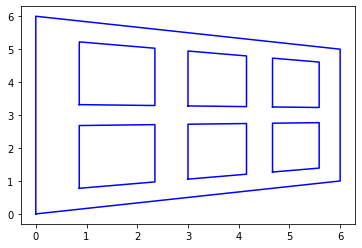

In [6]:
def umwandlung(Punkte):
    A = Matrix([[18, 0, 0], [3, 20, 0], [1, 0, 20]])
    neueMatrix = A * spaltenvektoren(Punkte)
    neueMatrix = kartesicheKoordinaten(neueMatrix)
    return neueMatrix

plt.plot([l[0] for l in umwandlung(Wand)], [l[1] for l in umwandlung(Wand)], color='b') #Wand
plt.plot([l[0] for l in umwandlung(F_1)], [l[1] for l in umwandlung(F_1)], color='b')   #Fenster_1
plt.plot([l[0] for l in umwandlung(F_2)], [l[1] for l in umwandlung(F_2)], color='b')   #Fenster_2
plt.plot([l[0] for l in umwandlung(F_3)], [l[1] for l in umwandlung(F_3)], color='b')   #Fenster_3
plt.plot([l[0] for l in umwandlung(F_4)], [l[1] for l in umwandlung(F_4)], color='b')   #Fenster_4
plt.plot([l[0] for l in umwandlung(F_5)], [l[1] for l in umwandlung(F_5)], color='b')   #Fenster_5
plt.plot([l[0] for l in umwandlung(F_6)], [l[1] for l in umwandlung(F_6)], color='b')   #Fenster_6
    

<br>




# Aufgabe 5

<br>


Im Folgenden werden wir eine Projektionsabbildung durch eine Matrix beschreiben. In Aufgabe 4 hatten wir ja bereits eine Matrix A vorgegeben und gesehen, dass diese eine perspektivische Projektion darstellt. In dieser Aufgabe bearbeiten wir die umgekehrte Aufgabenstellung.

<br>
<div style="text-align: justify">Stellen Sie sich dazu vor, Sie benutzen auf Ihrem Smartphone eine Scannerapp, um ein DIN A4 Dokument zu scannen. Bei Fotographieren ist das Dokument fast immer verzerrt. Wir suchen nun eine Abbildung, die die Verzerrung rückgängig macht und so das korrekte DIN A4 Dokument möglichst genau rekonstruiert:<div>

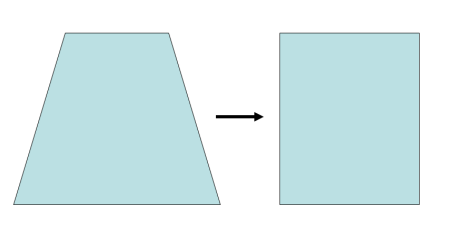



<div style="text-align: justify">Wenn diese Verzerrung nur durch die Perspektive der Fotographie zustande kam, so lässt sich die Verzerrung durch eine lineare Abbildung beheben. Durch die Vorgabe von vier Punkten für das ursprüngliche Bild sowie weiteren vier Punkten, auf die die „Original“–Punkte abgebildet werden, ist so eine lineare Abbildung in einer Ebene eindeutig definiert. Es genügt also, eine
Abbildungsmatrix für die Transformation der vier Ecken aufzustellen. Diese kann dann auf jeden Pixel des Bildes angewendet werden.<div>

<br>

**Wichtig**: Implementieren Sie bitte die folgenden Teilaufgaben so, dass man diese nicht nur mit den nachfolgend genannten Beispielpunkten, sondern zum Ausprobieren auch mit anderen Punkten ausführen kann. Diese sollten also anfangs einmal gesetzt werden, alle weiteren Ergebnisse bzw. Teilaufgaben müssen dann direkt oder indirekt davon abhängen (so dass also nicht etwa jedesmal händisch Zwischenergebnisse angepasst werden müssen).



<br>


a) Zeichnen Sie zwei Vierecke mit den vier Eckpunkten

$$P_{1}(0.1, 0.1),\,\,\,\, P_{2}(0.9, 0.1),\,\,\,\, P_{3}(0.7, 0.9),\,\,\,\, P_{4}(0.3, 0.9)$$
<br>
bzw.
<br>
$$Q_{1}(0.2, 0.15),\,\,\,\, Q_{2}(0.8, 0.15),\,\,\,\, Q_{3}(0.8, 0.85),\,\,\,\, Q_{4}(0.2, 0.85) .$$

<br>

Verwenden Sie für das Viereck mit den P–Ecken die Farbe **rot** und für das Viereck mit
den Q–Ecken die Farbe **blau**.

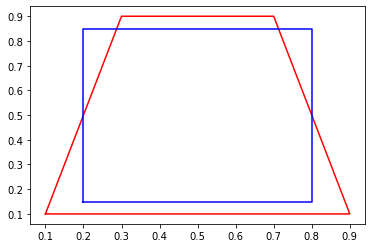

In [7]:
p_punkte = [[0.1,0.1],[0.9,0.1],[0.7,0.9],[0.3,0.9],[0.1,0.1] ]
q_punkte = [[0.2,0.15],[0.8,0.15],[0.8,0.85],[0.2,0.85],[0.2,0.15] ]

def p_ecken(punkte):
    plt.plot([l[0] for l in punkte], [l[1] for l in punkte], color='r')   #p_ecken

def q_ecken(punkte):
    plt.plot([l[0] for l in punkte], [l[1] for l in punkte], color='b')   #q_ecken

p_ecken(p_punkte)
q_ecken(q_punkte)
    

<br>



b) Transformieren Sie alle Punkte mit Hilfe der Python-Funktion aus Aufgabe 2 in homogene Koordinaten. Die so erhaltene
Matrix für die Punkte P1, . . . , P4 bezeichnen wir mit **v** und die Matrix für die Punkte Q1, . . . , Q4 mit **w**.


In [8]:
v = spaltenvektoren(p_punkte)

w = spaltenvektoren(q_punkte)
w,v

⎛⎡0.2   0.8   0.8   0.2   0.2 ⎤  ⎡0.1  0.9  0.7  0.3  0.1⎤⎞
⎜⎢                            ⎥  ⎢                       ⎥⎟
⎜⎢0.15  0.15  0.85  0.85  0.15⎥, ⎢0.1  0.1  0.9  0.9  0.1⎥⎟
⎜⎢                            ⎥  ⎢                       ⎥⎟
⎝⎣ 1     1     1     1     1  ⎦  ⎣ 1    1    1    1    1 ⎦⎠

 
<br>







c) Wir suchen jetzt die (3 × 3)–Matrix A, die $v_{0}$ auf $w_{0}, v_{1}$ auf $w_{1}$ usw. abbildet. Es soll also
<br>

$$A · v_{i} = m_{i}· w_{i}$$
<br>
für i = 0, 1, 2, 3 gelten, wobei $m_{0}, · · · , m_{3}$ ∈ R\{0} frei wählbare Zahlen sind (denn wie in Aufgabe 2 beschrieben stellen alle Vielfachen eines Vektors mit homogenen Koordinaten den gleichen Punkt dar). 



Wir haben nun neun Unbekannte aus der (3 × 3)–Matrix A <br>

$$\begin{bmatrix} a11 & a21 & a31 \\ a12 & a22 & a32 \\ a13 & a23 & a33 \end{bmatrix}$$


und ferner die vier schon erwähnten unbekannten Skalare $m_{0}, . . . , m_{3}$, also insgesamt 13 Unbekannte. Die vier Vektoren liefern uns jedoch nur 12 Gleichungen. Also wird die Lösung für die gesuchte Matrix nicht eindeutig sein (**können wir z.B. $m_{0}=1$ wählen**)

Stellen Sie die genannten 12 Gleichungen mit dem Befehl "Eq" von Sympy-Bibliothek als eine Liste auf und lösen Sie das resultierende Gleichungssystem mit dem Befehl "solve". Ferner ist der Befehl "subs" sehr hilfreich, wenn Sie die Werte der Matrix A schon berechnet haben. 

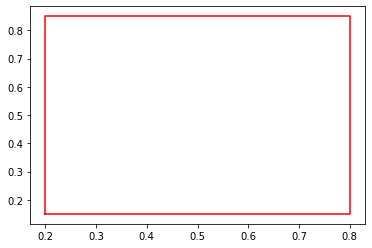

In [9]:
a11, a12, a13, a21, a22, a23, a31, a32, a33 = symbols('a11 a12 a13 a21 a22 a23 a31 a32 a33')
m0, m1, m2, m3 = symbols('m0 m1 m2 m3')
A = Matrix([[a11, a21, a31], [a12, a22, a32], [a13,a23,a33]])
m0 = 1
equation = [Eq(A*v[:,0], m0 * w[:,0]),
            Eq(A*v[:,1], m1 * w[:,1]),
            Eq(A*v[:,2], m2 * w[:,2]),
            Eq(A*v[:,3], m3 * w[:,3])]

A = A.subs(solve(equation))
neueMatrix = A * v
neueMatrix = kartesicheKoordinaten(neueMatrix)
plt.plot([l[0] for l in neueMatrix], [l[1] for l in neueMatrix], color='r') 










<br>
<div style="text-align: justify">d) Jetzt haben Sie mit Hilfe dieser Matrix die Abbildung beschrieben, die das eine Viereck in das andere überführt. Damit können wir jetzt für einen beliebigen weiteren Punkt $P_{4}$ prüfen, auf welchen Punkt $Q_{4}$ er abgebildet wird. Dazu stellen Sie $P_{4}$ wieder mit homogenen Koordinaten dar und multiplizieren diesen Spaltenvektor mit der Matrix A. Aus dem resultierenden Spaltenvektor erzeugen Sie, wie oben beschrieben, wieder den abgebildeten Punkt mit seinen kartesischen Koordinaten durch die Berechnung (x/z, y/z). Wählen Sie als Beispiel $P_{4}(0.6, 0.6)$ und zeichnen Sie ihn in rot ein. Den abgebildeten Punkt $Q_{4}$ färben Sie blau. Zeichnen Sie zusätzlich die beiden Vierecke mit ein:<div>

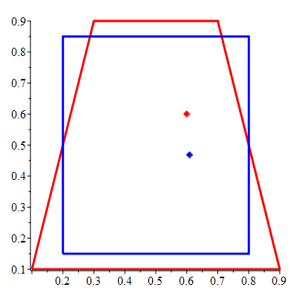


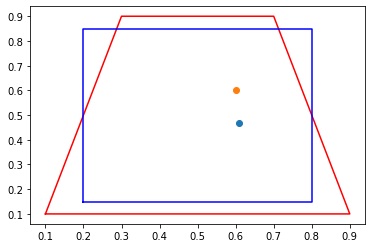

In [10]:
p_ecken(p_punkte)
q_ecken(q_punkte)

p4 = [[0.6,0.6,1]]

q4 = A * Matrix(p4).transpose()
neueMatrix = kartesicheKoordinaten(q4)
plt.scatter(neueMatrix[0][0],neueMatrix[0][1])
plt.scatter(p4[0][0], p4[0][1])
plt.show()






<br>


<div style="text-align: justify">e) Stellen Sie die Gleichungen der beiden Diagonalen im roten Viereck jeweils mit Stützvektor und Richtungsvektor auf. Verwenden Sie dazu Spaltenvektoren, die hier aber in kartesischen Koordinaten und nicht mit homogenen Koordinaten verwendet werden. Es handelt sich also um Spaltenvektoren mit 2 Koordinaten! Setzen Sie mit Hilfe des Eq–Befehls die beiden Geradengleichungen gleich. Berechnen Sie mit "solve" die Lösungen der beiden Gleichungen. Den Schnittpunkt der beiden Diagonalen erhalten wir dann einfach, indem wir eine der beiden Lösungen in die entsprechende Geradengleichung einsetzen.<div>

In [11]:
# Die vier Eckpunkten für das rote Viereck
P = [[0.1, 0.1], [0.9, 0.1], [0.7, 0.9], [0.3, 0.9], [0.1, 0.1]]

# Die Berechunungen für das rote Viereck
#Stützvektor erster Diagonale 
SVP1=Matrix(P[0])

#Richtungsvektor erster Diagonale 
RVP1=Matrix(P[2])-Matrix(P[0])

#Stützvektor zweiter Diagonale 
SVP2=Matrix(P[1])

#Richtungsvektor zweiter Diagonale 
RVP2=Matrix(P[3])-Matrix(P[1])

# Die Lösungen der beiden Gleichungen
t,r = symbols('t r')

equations = [Eq(SVP1 + t * RVP1, SVP2 + r * RVP2)]
solution = solve(equations)
#solution = {r:0.666666666666667, t:0.666666666666667}

# Der Schnittpunk

SPR = SVP1 + solution[r] * RVP1
SPR

⎡       0.5       ⎤
⎢                 ⎥
⎣0.633333333333333⎦

<br>


f) Führen Sie die Berechnung des Schnittpunktes der beiden Diagonalen auch für das blaue
Viereck aus.

In [12]:
# Die vier Eckpunkten für das blue Viereck
Q = [[0.2, 0.15], [0.8, 0.15], [0.8, 0.85], [0.2, 0.85], [0.2, 0.15]]

# Die Bechunungen für das blaue Viereck
#Stützvektor erster Diagonale 
SVQ1=Matrix(Q[0])

#Richtungsvektor erster Diagonale 
RVQ1=Matrix(Q[2])-Matrix(Q[0])

#Stützvektor zweiter Diagonale 
SVQ2=Matrix(Q[1])

#Richtungsvektor zweiter Diagonale 
RVQ2=Matrix(Q[3])-Matrix(Q[1])

# Die Lösungen der beiden Gleichungen
t,r = symbols('t r')

equations = [Eq(SVQ1 + t * RVQ1, SVQ2 + r * RVQ2)]
solution = solve(equations)
# Der Schnittpunk

SQR = SVQ1 + solution[r] * RVQ1
SQR 

⎡0.5⎤
⎢   ⎥
⎣0.5⎦




<br>



g) Die Matrix A beschreibt eine Abbildung, die das eine Viereck in das andere überführt. Sie bildet aber gleichzeitig auch Geraden auf Geraden ab und erhält die sog. „Inzidenz“, d.h. wenn ein Punkt auf einer Geraden liegt, dann liegt auch der abgebildete Punkt auf der abgebildeten Geraden. Überprüfen Sie dies bitte für den folgenden einfachen Fall: Wenn man den Schnittpunkt der beiden Diagonalen des roten Vierecks mit der Matrix A abbildet (wie in der Teilaufgabe d), dann muss das Ergebnis den Schnittpunkt der beiden Diagonalen des blauen Vierecks ergeben!

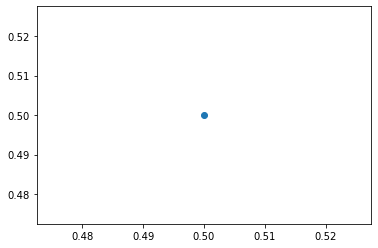

In [13]:
Matrix(SPR)
SPR = SPR.row_insert(2, Matrix([1]))
SPRmatrix = A * Matrix(SPR)
neueMatrix = kartesicheKoordinaten(SPRmatrix)
plt.scatter(neueMatrix[0][0],neueMatrix[0][1])
plt.show()